In [1]:
# %matplotlib inline
%time from hikyuu.interactive import *

2025-11-04 10:33:05,254 [INFO] runing in interactive session [<module>] (F:\anaconda\envs\hikyuu_hub\Lib\site-packages\hikyuu\__init__.py:131) [hikyuu::hku_info]
2025-11-04 10:33:05,254 [INFO] running in jupyter [<module>] (F:\anaconda\envs\hikyuu_hub\Lib\site-packages\hikyuu\__init__.py:138) [hikyuu::hku_info]


2025-11-04 10:33:05.266 [HKU-I] - Plugin path: F:\anaconda\envs\hikyuu_hub\Lib\site-packages\hikyuu\plugin (StockManager.cpp:113)
2025-11-04 10:33:05.443 [HKU-I] - Using SQLITE3 BaseInfoDriver (BaseInfoDriver.cpp:57)
2025-11-04 10:33:05.446 [HKU-I] - 加载市场信息…… (StockManager.cpp:704)
2025-11-04 10:33:05.446 [HKU-I] - 加载证券类型信息…… (StockManager.cpp:722)
2025-11-04 10:33:05.447 [HKU-I] - 加载证券信息…… (StockManager.cpp:602)
2025-11-04 10:33:05.584 [HKU-I] - 加载权息数据…… (StockManager.cpp:740)
2025-11-04 10:33:05.776 [HKU-I] - 加载板块信息…… (StockManager.cpp:182)
2025-11-04 10:33:06.066 [HKU-I] - 加载K线数据…… (StockManager.cpp:186)
2025-11-04 10:33:06.067 [HKU-I] - 预加载 day K线数据至缓存 (最大数量: 100000)! (StockManager.cpp:231)
2025-11-04 10:33:06.067 [HKU-I] - 0.62 秒数据加载完毕. (StockManager.cpp:193)
CPU times: total: 3.72 s
Wall time: 3.43 s


In [15]:
import sys
import os

# 获取当前 Notebook 的目录
notebook_dir = os.getcwd()

# 假设项目根目录是 Notebook 所在目录的上一级
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))

# 将项目根目录添加到 sys.path
if project_root not in sys.path:
    sys.path.append(project_root)

# 现在可以导入 src 目录下的模块
from tdx import extdata_util

# 使用模块中的类
# obj = my_custom_module.MyClass("Bob")
# print(obj.greet())  # 输出: Hello, Bob!

In [39]:
# 读取RPS数据索引

def load_rps_10(code: str):
    
    idx_df = extdata_util.load_idx_data("C:\\hwx\\T0002\\extdata\\extdata_1.idx")
    print(idx_df.head())
    idx_df.to_csv("extdata_1_idx.csv")
    
    stock_data = extdata_util.load_stock_data_optimized(dat_path = "C:\\hwx\\T0002\\extdata\\extdata_1.dat",
                                           idx_df = idx_df,
                                           stock_codes = {code})
    df = stock_data[code]
    print(df.head())
    df['value_f'] /= 10
    df['date'] = pd.to_datetime(df['date_int'].astype(str), format='%Y%m%d')
    return df

df = load_rps_10('600010')
x = df_to_ind(df, 'value_f', 'date')
print(x)

# 转换为ind并对齐

2025-11-04 11:19:32,916 [INFO] 加载idx文件: C:\hwx\T0002\extdata\extdata_1.idx [tdx.extdata_util::load_idx_data]
2025-11-04 11:19:32,931 [INFO] 优化加载dat文件: C:\hwx\T0002\extdata\extdata_1.dat [tdx.extdata_util::load_stock_data_optimized]


   i  market_code stock_code  record_count  cum_sum
0  0            0     000001           490        0
1  1            0     000002           490      490
2  2            0     000006           490      980
3  3            0     000007           490     1470
4  4            0     000008           490     1960


加载股票数据: 100%|█████████████████████████████████████| 5144/5144 [00:00<00:00, 25708.38只/s]

   date_int  time_int  value_f
0  20231026         0    302.0
1  20231027         0    263.0
2  20231030         0    248.0
3  20231031         0    235.0
4  20231101         0    301.0
Indicator{
  name: PRICELIST
  size: 490
  discard: 0
  result sets: 1
  params: params[align_date_list(DatetimeList): 490, data(PriceList): 490, discard(int): 0, kdata(KData): Null, ]
  support indicator param: False
  formula: PRICELIST
  first: 2023-10-26 00:00:00
  last: 2025-11-03 00:00:00
  values0: [30.2, 26.3, 24.8, ..., 17, 3.7, 25.7]
}


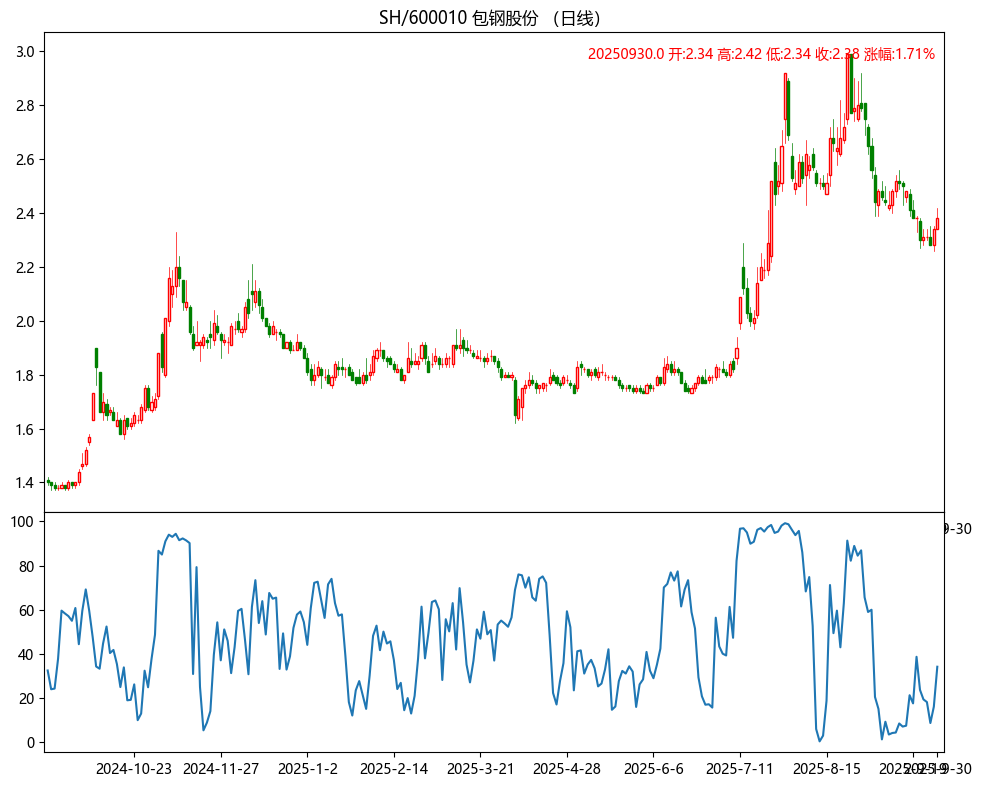

In [48]:
code = '600010'
s = sm['sh600010']
q = Query(Datetime(202409080000), Datetime(202510080000), recover_type=Query.FORWARD)
# q = Query(-100, recover_type=Query.FORWARD)
k = s.get_kdata(q)
rps_10 = ALIGN(x, k)

#创建两个显示坐标轴的窗口
ax1,ax2 = create_figure(2)

#在第一个坐标轴中绘制K线和EMA
k.plot(axes=ax1)
rps_10.plot(axes=ax2)